In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hdbscan

from sklearn.cluster import OPTICS, DBSCAN

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

In [14]:
test_data = pd.read_csv('Mall_Customers.csv', encoding='Latin-1') 
test_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
test_data = test_data.iloc[:,[3,4]].values

In [16]:
test_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

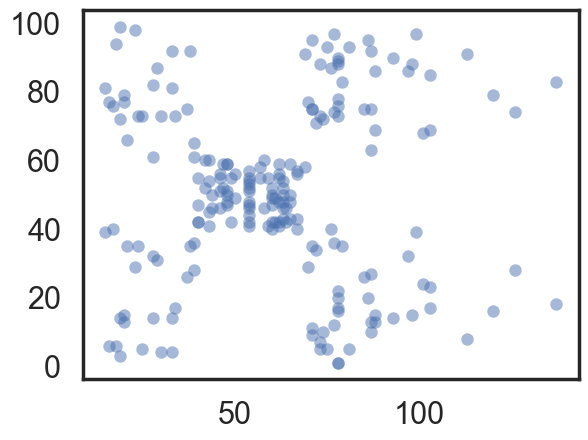

In [17]:
plt.scatter(test_data[:,0], test_data[:,1], color='b', **plot_kwds)

In [18]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer = hdbscan.HDBSCAN(min_cluster_size=9, gen_min_span_tree=True, approx_min_span_tree=True)
clusterer.fit(test_data)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [19]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

AttributeError: No minimum spanning tree was generated.This may be due to optimized algorithm variations that skip explicit generation of the spanning tree.

In [20]:
clusterer.condensed_tree_.plot()

AttributeError: No condensed tree was generated; try running fit first.

In [21]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

AttributeError: No condensed tree was generated; try running fit first.

In [22]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering")
plt.show()

AttributeError: 'HDBSCAN' object has no attribute 'labels_'